In [1]:
import os
os.chdir('..')

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *

In [5]:
data_path = Path().cwd() / 'data'; data_path

PosixPath('/home/jupyter/RASM2019/data')

In [6]:
mask_path = data_path / 'task1_masks'; mask_path

PosixPath('/home/jupyter/RASM2019/data/task1_masks')

In [7]:
original_tif_files_path = data_path / 'raw_data' / 'image_files'

In [8]:
train_image_files = original_tif_files_path.ls(); len(train_image_files)

20

In [10]:
def get_path_to_mask(filename):
    return data_path / 'raw_data' / 'mask_files' / f'{filename}_mask.png'

## Perform some data augmentation to increase sample size of dataset

Running
torch.Size([8956, 6182]) torch.Size([8956, 6182])
torch.Size([8956, 6182]) torch.Size([8956, 6182])
torch.Size([8956, 6182]) torch.Size([8956, 6182])
torch.Size([8956, 6182]) torch.Size([8956, 6182])
torch.Size([8956, 6182]) torch.Size([8956, 6182])
torch.Size([8956, 6182]) torch.Size([8956, 6182])
torch.Size([8956, 6182]) torch.Size([8956, 6182])
torch.Size([8956, 6182]) torch.Size([8956, 6182])
torch.Size([8956, 6182]) torch.Size([8956, 6182])
torch.Size([8956, 6182]) torch.Size([8956, 6182])
torch.Size([8956, 6182]) torch.Size([8956, 6182])
torch.Size([8956, 6182]) torch.Size([8956, 6182])
torch.Size([8956, 6182]) torch.Size([8956, 6182])
torch.Size([8956, 6182]) torch.Size([8956, 6182])
torch.Size([8956, 6182]) torch.Size([8956, 6182])


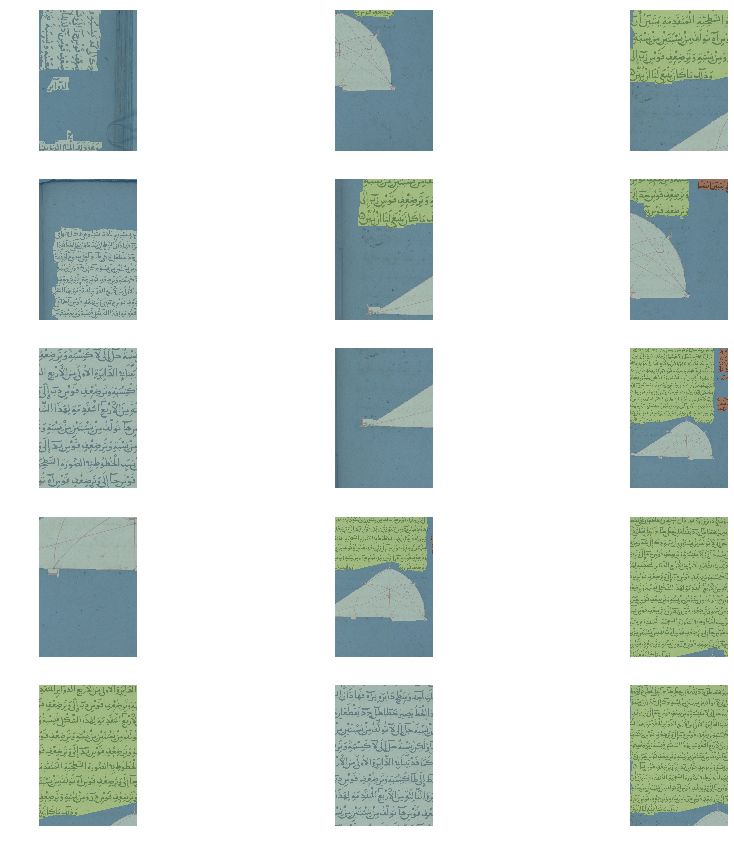

In [14]:
print('Running')
tfms = zoom_crop(scale=(1., 3.0), do_rand=True)
_, axs = plt.subplots(5, 3, figsize=(15,15))
img = open_image(data_path / 'raw_data' / 'image_files' / 'Add MS 7474_0043.tif')
mask = open_mask(get_path_to_mask('Add MS 7474_0043'))
for ax in axs.flatten():
    aug_img = img.apply_tfms(tfms[0], resize_method=ResizeMethod.CROP)
    aug_mask = mask.apply_tfms(tfms[0], resize_method=ResizeMethod.CROP, do_resolve=False)
    print(aug_img.size, aug_mask.size)
    aug_img.show(ax=ax, y=aug_mask)


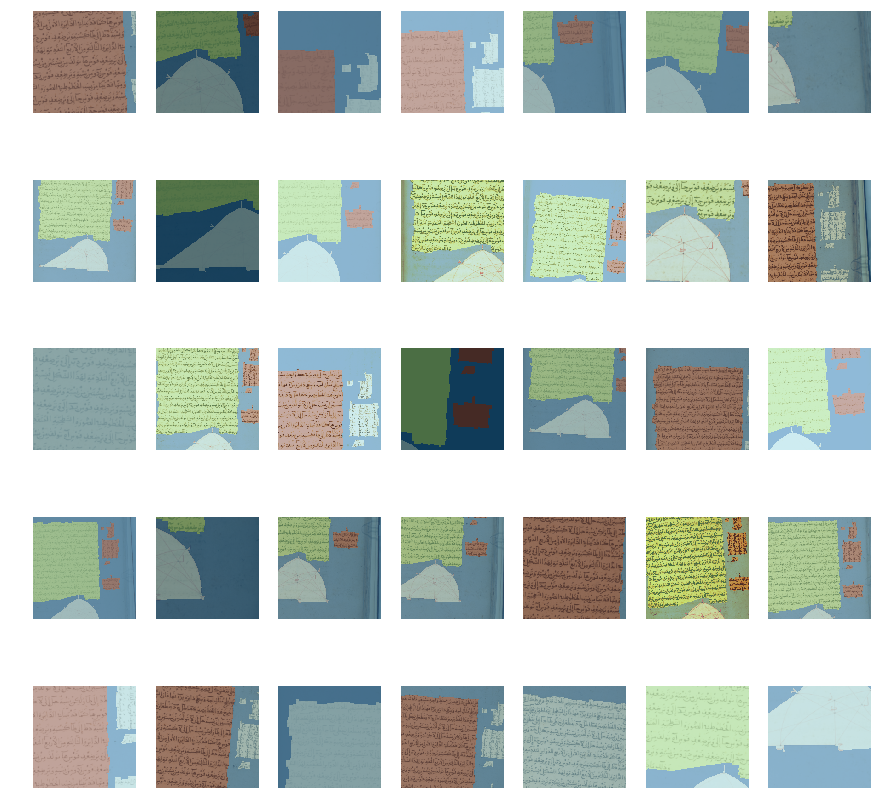

In [20]:
tfms = get_transforms(do_flip=False, max_rotate=5, max_zoom=3.0, max_lighting=0.5, max_warp=None, p_affine=1.0)
_, axs = plt.subplots(5, 7, figsize=(15,15))
for ax in axs.flatten():
    img = open_image(data_path / 'raw_data' / 'image_files' / 'Add MS 7474_0043.tif')
    mask = open_mask(get_path_to_mask('Add MS 7474_0043'))
    img = img.apply_tfms(tfms[0], resize_method=ResizeMethod.CROP, size=224)
    mask = mask.apply_tfms(tfms[0], resize_method=ResizeMethod.CROP, do_resolve=False, size=224)
    img.show(ax=ax, y=mask)

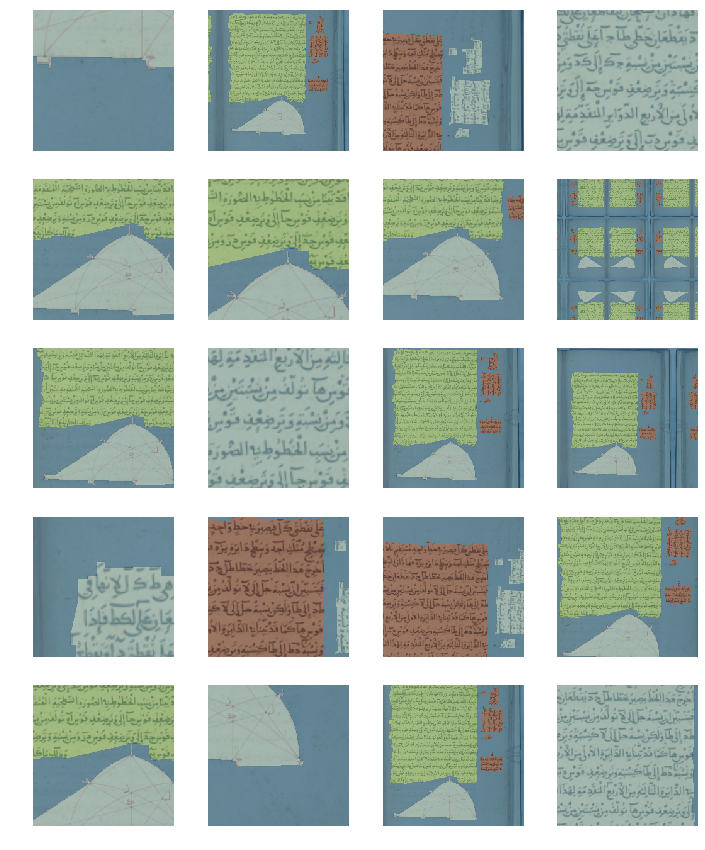

In [18]:
# tfms = get_transforms(do_flip=False, max_rotate=None, max_zoom=3.0, max_lighting=0.5, max_warp=None)
tfms = zoom_crop(scale=(1., 5), do_rand=True)
_, axs = plt.subplots(5, 4, figsize=(12,15))
for ax in axs.flatten():
    img = open_image(data_path / 'train' / 'Add MS 7474_0043.tif')
    mask = open_mask(get_path_to_mask('Add MS 7474_0043'))
    img = img.apply_tfms(tfms[0], resize_method=ResizeMethod.CROP, size=224)
    mask = mask.apply_tfms(tfms[0], resize_method=ResizeMethod.CROP, do_resolve=False, size=224)
    img.show(ax=ax, y=mask)

## Try running some augmentation and saving it to images

In [9]:
data_path

PosixPath('/home/jupyter/RASM2019/data')

In [10]:
def save_mask(mask, fn:PathOrStr):
    "Save the image to `fn`."
    x = image2np(mask.data).astype(np.uint8)
    PIL.Image.fromarray(x).save(fn)

In [21]:
def generate_augmented_data(image_file_name, n=20):
    file_name = image_file_name.stem
    print(file_name)
    tfms = zoom_crop(scale=(1., 3.0), do_rand=True)
#     tfms = get_transforms(do_flip=False, max_rotate=5, max_zoom=3.0, max_lighting=0.5, max_warp=None, p_affine=1.0)
    img = open_image(image_file_name)
    mask = open_mask(data_path / 'raw_data' / 'mask_files' /  f'{file_name}_mask.png')

    for i in range(n):
        aug_img = img.apply_tfms(tfms[0], resize_method=ResizeMethod.CROP, size=img.size)
        aug_mask = mask.apply_tfms(tfms[0], resize_method=ResizeMethod.CROP, do_resolve=False, size=mask.size)
        aug_img.save(data_path / 'task1_train' / f'gen_{i}_{file_name}.tif')
        save_mask(aug_mask, data_path / 'task1_masks' / f'gen_{i}_{file_name}_mask.png')
        

In [22]:
data_path

PosixPath('/home/jupyter/RASM2019/data')

In [23]:
from concurrent.futures import ProcessPoolExecutor

with ProcessPoolExecutor() as executor:
    executor.map(generate_augmented_data, train_image_files)

Or 14791_0017
Add MS 7474_0042
Delhi Arabic 1901_0155
Add MS 7474_0032
Or 13006_0042
Or 8349_0020
Add MS 7474_0013
Or 8349_0019
Delhi Arabic 1901_0036
Or 13006_0172
Or 5593_0033
Add MS 7474_0043
Add MS 23494_0031
Or 3366_0111
Delhi Arabic 1901_0154
Or 5593_0024
Or 5593_0034
Or 5593_0083
Add MS 7474_0028
Or 13006_0169


In [24]:
def show_image_with_mask(file_name):
    img = open_image(data_path / 'task1_train' /  f'{file_name}.tif')
    mask = open_mask(data_path / 'task1_masks' /  f'{file_name}_mask.png')
    img.show(y=mask, figsize=(10,9))

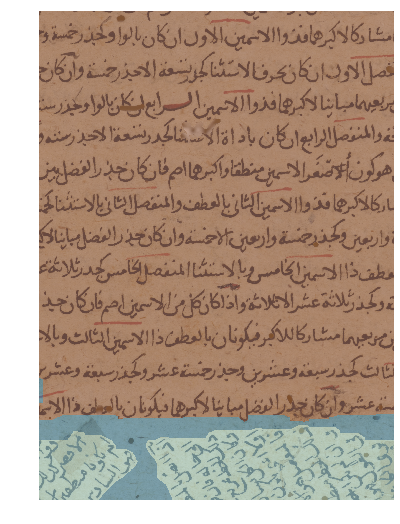

In [25]:
show_image_with_mask('gen_16_Delhi Arabic 1901_0154')

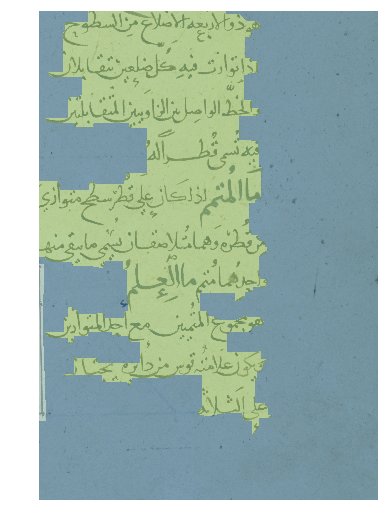

In [26]:
show_image_with_mask('gen_7_Or 8349_0019')

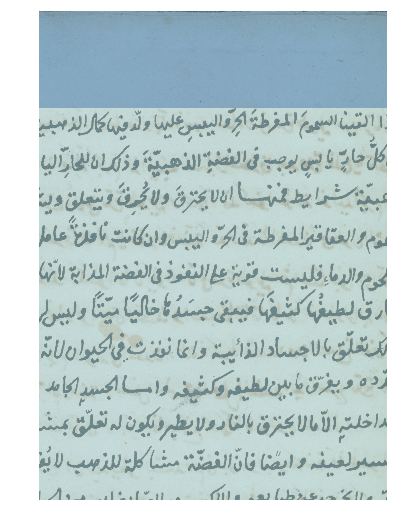

In [27]:
show_image_with_mask('gen_12_Or 13006_0172')